In [9]:
# Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [10]:
y = dataset.iloc[:, 1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

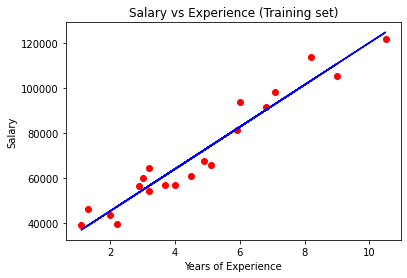

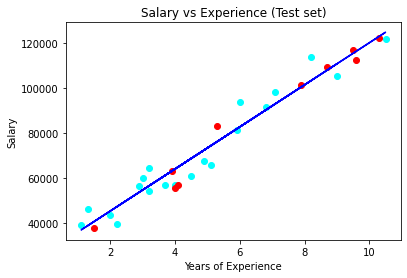

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # y_train = 45* x_train + 67

# Predicting the Test set results
y_pred = regressor.predict(X_test)# y_pred = 45* x_test + 67

#x_new = array([ 20 ])
#y_new = regressor.predict(X_new)
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_train, y_train, color = 'cyan')
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [13]:
from sklearn import metrics
r2_value = regressor.score(X_train, y_train) # Coefficient of determination
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Slope(b1): \n", regressor.coef_) # (sum((x-Xmean)*(y-YMean)/n)* (1/sigmaX*sigmaY)
print("Y Intercept(b0): \n", regressor.intercept_) #Value of y when x = 0 in y = mx + c 
print("R^2 value: \n", r2_value)
print("Mean Abs Err: \n", mae)
print("Mean Square Err: \n", mse)
print("Root Mean Square Err: \n", rmse)

Slope(b1): 
 [9345.94244312]
Y Intercept(b0): 
 26816.192244031183
R^2 value: 
 0.9381900012894278
Mean Abs Err: 
 3426.4269374307078
Mean Square Err: 
 21026037.329511296
Root Mean Square Err: 
 4585.4157204675885


In [23]:
#Trying another library using Statsmodel

import statsmodels.api as sm
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 08 May 2020   Prob (F-statistic):           1.14e-20
Time:                        13:15:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.0